In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from bs4 import BeautifulSoup
from collections import Counter,defaultdict
from gensim.models import Word2Vec,KeyedVectors
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import plotly.graph_objs as go
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import re
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD,SparsePCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,r2_score,recall_score,confusion_matrix,precision_recall_curve
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,StratifiedKFold,KFold,StratifiedShuffleSplit,cross_val_predict
from lightgbm import LGBMClassifier as lg
from sklearn.ensemble import RandomForestRegressor,GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM, Dense,Flatten,Conv2D,Conv1D,GlobalMaxPooling1D,GlobalMaxPool1D
from keras.optimizers import Adam
import numpy as np  
import pandas as pd 
import keras.backend as k
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional,GRU
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from xgboost import XGBClassifier as xg
from lightgbm import LGBMClassifier as lg
import string
from unidecode import unidecode
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

In [ ]:
train_df= pd.read_json("/kaggle/input/github-bugs-prediction/embold_train.json").reset_index(drop=True)
test_df= pd.read_json("/kaggle/input/github-bugs-prediction/embold_test.json").reset_index(drop=True)
train_extra_df= pd.read_json("../input/github-bugs-prediction/embold_train_extra.json").reset_index(drop=True)

In [ ]:
def fx(x):
    return x['title'] + " " + x['body']   
train_df['text']= train_df.apply(lambda x : fx(x),axis=1)
test_df['text']= test_df.apply(lambda x : fx(x),axis=1)

In [ ]:
cList = {
            "i'm": "i am",
            "you're": "you are",
            "it's": "it is",
            "we're": "we are",
            "we'll": "we will",
            "That's":"that is",
            "haven't":"have not",
            "let's":"let us",
            "ain't": "am not / are not / is not / has not / have not",
            "aren't": "are not / am not",
            "can't": "cannot",
            "can't've": "cannot have",
            "'cause": "because",
            "could've": "could have",
            "couldn't": "could not",
            "couldn't've": "could not have",
            "didn't": "did not",
            "doesn't": "does not",
            "don't": "do not",
            "hadn't": "had not",
            "hadn't've": "had not have",
            "hasn't": "has not",
            "haven't": "have not",
            "he'd": "he had / he would",
            "he'd've": "he would have",
            "he'll": "he shall / he will",
            "he'll've": "he shall have / he will have",
            "he's": "he has / he is",
            "how'd": "how did",
            "how'd'y": "how do you",
            "how'll": "how will",
            "how's": "how has / how is / how does",
            "I'd": "I had / I would",
            "I'd've": "I would have",
            "I'll": "I shall / I will",
            "I'll've": "I shall have / I will have",
            "I'm": "I am",
            "I've": "I have",
            "isn't": "is not",
            "it'd": "it had / it would",
            "it'd've": "it would have",
            "it'll": "it shall / it will",
            "it'll've": "it shall have / it will have",
            "it's": "it has / it is",
            "let's": "let us",
            "ma'am": "madam",
            "mayn't": "may not",
            "might've": "might have",
            "mightn't": "might not",
            "mightn't've": "might not have",
            "must've": "must have",
            "mustn't": "must not",
            "mustn't've": "must not have",
            "needn't": "need not",
            "needn't've": "need not have",
            "o'clock": "of the clock",
            "oughtn't": "ought not",
            "oughtn't've": "ought not have",
            "shan't": "shall not",
            "sha'n't": "shall not",
            "shan't've": "shall not have",
            "she'd": "she had / she would",
            "she'd've": "she would have",
            "she'll": "she shall / she will",
            "she'll've": "she shall have / she will have",
            "she's": "she has / she is",
            "should've": "should have",
            "shouldn't": "should not",
            "shouldn't've": "should not have",
            "so've": "so have",
            "so's": "so as / so is",
            "that'd": "that would / that had",
            "that'd've": "that would have",
            "that's": "that has / that is",
            "there'd": "there had / there would",
            "there'd've": "there would have",
            "there's": "there has / there is",
            "they'd": "they had / they would",
            "they'd've": "they would have",
            "they'll": "they shall / they will",
            "they'll've": "they shall have / they will have",
            "they're": "they are",
            "they've": "they have",
            "to've": "to have",
            "wasn't": "was not",
            "we'd": "we had / we would",
            "we'd've": "we would have",
            "we'll": "we will",
            "we'll've": "we will have",
            "we're": "we are",
            "we've": "we have",
            "weren't": "were not",
            "what'll": "what shall / what will",
            "what'll've": "what shall have / what will have",
            "what're": "what are",
            "what's": "what has / what is",
            "what've": "what have",
            "when's": "when has / when is",
            "when've": "when have",
            "where'd": "where did",
            "where's": "where has / where is",
            "where've": "where have",
            "who'll": "who shall / who will",
            "who'll've": "who shall have / who will have",
            "who's": "who has / who is",
            "who've": "who have",
            "why's": "why has / why is",
            "why've": "why have",
            "will've": "will have",
            "won't": "will not",
            "won't've": "will not have",
            "would've": "would have",
            "wouldn't": "would not",
            "wouldn't've": "would not have",
            "y'all": "you all",
            "y'all'd": "you all would",
            "y'all'd've": "you all would have",
            "y'all're": "you all are",
            "y'all've": "you all have",
            "you'd": "you had / you would",
            "you'd've": "you would have",
            "you'll": "you shall / you will",
            "you'll've": "you shall have / you will have",
            "you're": "you are",
            "you've": "you have"
           }

In [ ]:
c_re = re.compile('(%s)' % '|'.join(cList.keys()))
def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

In [ ]:
def remove_emoji(string):
        emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', string) 

In [ ]:
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

In [ ]:
def removeSpecialChars(data):
    '''
    Removes special characters which are specifically found in tweets.
    '''
    #Converts HTML tags to the characters they represent
    soup = BeautifulSoup(data, "html.parser")
    data = soup.get_text()

    #Convert www.* or https?://* to empty strings
    data = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',data)

    #Convert @username to empty strings
    data = re.sub('@[^\s]+','',data)
    
    #remove org.apache. like texts
    data =  re.sub('(\w+\.){2,}','',data)

    #Remove additional white spaces
    data = re.sub('[\s]+', ' ', data)
    
    data = re.sub('\.(?!$)', '', data)

    #Replace #word with word
    data = re.sub(r'#([^\s]+)', r'\1', data)

    return data 

In [ ]:
def remove_nonenglish_charac(string):
    return re.sub('\W+','', string )

In [ ]:
extra_punctuations = ['','.', '``', '...', '\'s', '--', '-', 'n\'t', '_', '–','&']
stopword_list = stopwords.words('english') + list(string.punctuation)+ extra_punctuations + ['u','the','us','say','that','he','me','she','get','rt','it','mt','via','not','and','let','so','say','dont','use','you']

In [ ]:
def clean_text(data):
    wordnet_lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer() 
    tokenizer=TweetTokenizer()
    data = unidecode(data)
    data = expandContractions(data)
    tokens = tokenizer.tokenize(data)
    data = ' '.join([tok for tok in tokens if len(tok) > 2 if tok not in stopword_list and not tok.isdigit()])
    data = re.sub('\b\w{,2}\b', '', data)
    data = re.sub(' +', ' ', data)
    data = removeSpecialChars(data)
    data = remove_emoji(data)
    data= [stemmer.stem(w) for w in data.split()]
    return ' '.join([wordnet_lemmatizer.lemmatize(word) for word in data])

In [ ]:
train_df['text'] = train_df['text'].apply(lambda x: clean_text(x))

In [ ]:
def Split_Data(df,col_name):
    #Split the dataset into training and testing sets
    df_y=df['label']
    return train_test_split(df[col_name],df_y,test_size=0.3,random_state=42)

In [ ]:
def tokenize_data_with_padding(train_x,val_x):
    tokenizer=Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(list(train_x))
    train_x=tokenizer.texts_to_sequences(train_x)
    val_x=tokenizer.texts_to_sequences(val_x)
    train_x=pad_sequences(train_x,maxlen=maxlen)
    val_x=pad_sequences(val_x,maxlen=maxlen)
    print("Padded and Tokenized Training Sequence".format(),train_x.shape)
    print("Target training Values Shape".format(),train_y.shape)
    print("Padded and Tokenized Validation Sequence".format(),val_x.shape)
    print("Target validation Values Shape".format(),val_y.shape)
    return train_x,val_x,tokenizer

In [ ]:
train_x,val_x,train_y,val_y=Split_Data(train_df,'text')

In [ ]:
maxlen=1000
max_features=5000 
embed_size=300

In [ ]:
train_x, val_x, tokenized_data = tokenize_data_with_padding(train_x,val_x)

## Sequence to Sequence Model
- Sequence-to-sequence learning (Seq2Seq) is about training models to convert sequences from one domain (e.g. sentences in English) to sequences in another domain (e.g. the same sentences translated to French).
- A sequence to sequence model aims to map a fixed-length input with a fixed-length output where the length of the input and output may differ.
- For example, translating “What are you doing today?” from English to Chinese has input of 5 words and output of 7 symbols (今天你在做什麼？). Clearly, we can’t use a regular LSTM network to map each word from the English sentence to the Chinese sentence.
- In Sequence to Sequence models without attention, we process and predict the sentence sequentially
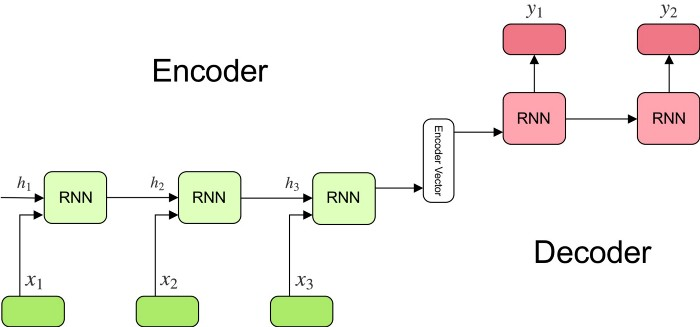
### Encoder
- A stack of several recurrent units (LSTM or GRU cells for better performance) where each accepts a single element of the input sequence, collects information for that element and propagates it forward.
- In question-answering problem, the input sequence is a collection of all words from the question. Each word is represented as x_i where i is the order of that word.
### Encoder Vector
- This is the final hidden state produced from the encoder part of the model. It is calculated using the formula above.
- This vector aims to encapsulate the information for all input elements in order to help the decoder make accurate predictions.
- It acts as the initial hidden state of the decoder part of the model.
### Decoder
- A stack of several recurrent units where each predicts an output y_t at a time step t.
- Each recurrent unit accepts a hidden state from the previous unit and produces and output as well as its own hidden state.
- In the question-answering problem, the output sequence is a collection of all words from the answer. Each word is represented as y_i where i is the order of that word.
*************************************************************************************************************************************************************************
- We calculate the outputs using the hidden state at the current time step together with the respective weight W(S). Softmax is used to create a probability vector which will help us determine the final output 

## Basic seq2seq model without pretrained embedding

- That return sequences return the hidden state output for each input time step.
- That return state returns the hidden state output and cell state for the last input time step.
- That return sequences and return state can be used at the same time.

In [ ]:
def seq2seq_encoder_decoder(maxlen,max_features,embed_size):
    
    #Creating LSTM  encoder neural model with no pretrained embeddings
    encoder_inp=Input(shape=(maxlen,))
    encoder_embed=Embedding(max_features,embed_size,input_length=maxlen,trainable=True)(encoder_inp)
    encoder_lstm_cell=LSTM(100,return_state='True')
    encoder_outputs,encoder_state_lstm_h,encoder_state_lstm_c=encoder_lstm_cell(encoder_embed)
    print(f'Encoder Ouputs Shape{encoder_outputs.shape}')
    #Creating LSTM decoder model and feeding the output states (h,c) of lstm of encoders
    decoder_inp=Input(shape=(maxlen,))
    decoder_embed=Embedding(max_features,embed_size,input_length=maxlen,trainable=True)(decoder_inp)
    decoder_lstm_cell=LSTM(100,return_state=True)
    decoder_outputs,decoder_state_lstm_h,decoder_state_lstm_c=decoder_lstm_cell(decoder_embed,initial_state=[encoder_state_lstm_h,encoder_state_lstm_c])
    decoder_dense_cell=Dense(16,activation='relu')
    decoder_d_output=decoder_dense_cell(decoder_outputs)
    decoder_dense_cell2=Dense(3,activation='softmax')
    decoder_output=decoder_dense_cell2(decoder_d_output)
    model=Model([encoder_inp,decoder_inp],decoder_output)
    model.summary()
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    plot_model(
    model,to_file="seq2seq_encoder_decoder_model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96)
    model.fit([train_x,train_x],train_y,batch_size=512,epochs=1,verbose=2)

In [ ]:
seq2seq_encoder_decoder(maxlen,max_features,embed_size)

In [ ]:
def del_obj(*objs):
    for obj in objs:
        del obj
        gc.collect()

In [ ]:
def get_coefs(word,*arr): 
    return word, np.asarray(arr, dtype='float32')

In [ ]:
def create_Embedding_matrix(EMBEDDING_FILE,tokenizer):
    # Create the dictionary of pretrained embedding
    embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE) if len(o)>100)
    
    # prepared multidimentional dictionary
    embeds = np.stack(embeddings_index.values())
    emb_mean,emb_std = embeds.mean(), embeds.std()
    embed_size = embeds.shape[1]
    
    # prepare a gausian distribution
    word_index = tokenizer.word_index
    nb_words = min(max_features, len(word_index))
    embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
    for word, i in word_index.items():
        if i >= max_features: continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None: 
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

## Sed2Seq model with pretrained embedding matrix
- Here I am applying pretrained static embedding (like Glove-embedding) to the seq2seq encoder decode model comprising of LSTM model.

In [ ]:
def seq2seq_encoder_decoder_with_embedding(maxlen,max_features,embed_size,embedding_matrix,emb_name):
    #Creating LSTM  encoder neural model with pretrained embeddings
    encoder_inp=Input(shape=(maxlen,))
    encoder_embed=Embedding(max_features,embed_size,weights=[embedding_matrix])(encoder_inp)
    encoder_lstm_cell= LSTM(60, return_state=True)
    encoder_outputs,encoder_state_lstm_h,encoder_state_lstm_c=encoder_lstm_cell(encoder_embed)
    print(f'Encoder Ouputs Shape{encoder_outputs.shape}')
    #Creating LSTM decoder model and feeding the output states (h,c) of lstm of encoders
    decoder_inp=Input(shape=(maxlen,))
    decoder_embed=Embedding(max_features,embed_size,weights=[embedding_matrix])(decoder_inp)
    decoder_lstm_cell= LSTM(60,return_state=True)
    decoder_outputs,decoder_state_lstm_h,decoder_state_lstm_c=decoder_lstm_cell(decoder_embed,initial_state=[encoder_state_lstm_h,encoder_state_lstm_c])
    decoder_dense_cell=Dense(16,activation='relu')
    decoder_d_output=decoder_dense_cell(decoder_outputs)
    decoder_dense_cell2=Dense(3,activation='softmax')
    decoder_output=decoder_dense_cell2(decoder_d_output)
    model=Model([encoder_inp,decoder_inp],decoder_output)
    model.summary()
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    plot_model(
        model,to_file=emb_name,
        show_shapes=True,
        show_layer_names=True,
        rankdir="TB",
        expand_nested=False,
        dpi=96)

    model.fit([train_x,train_x],train_y,batch_size=256,epochs=2,verbose=2)

In [ ]:
golve_emd_file = '../input/glove-global-vectors-for-word-representation/glove.6B.50d.txt'
golve_emd_matrix = create_Embedding_matrix(golve_emd_file,tokenized_data)
seq2seq_encoder_decoder_with_embedding(maxlen,max_features,len(golve_emd_matrix[0]),golve_emd_matrix,"seq2seq_encoder_decoder_model_glovetext.png")

In [ ]:
del(golve_emd_matrix)

In [ ]:
def bidirectional_seq2seq_encoder_decoder_with_embdedding(bidire_model,maxlen,max_features,embed_size,embedding_matrix,emb_name):
    #Creating LSTM  encoder neural model with no pretrained embeddings
    encoder_inp=Input(shape=(maxlen,))
    encoder_embed=Embedding(max_features,embed_size,weights=[embedding_matrix])(encoder_inp)
    encoder_lstm_cell=Bidirectional(bidire_model)
    encoder_outputs,encoder_state_flstm_h,encoder_state_flstm_c,encoder_state_blstm_h,encoder_state_blstm_c=encoder_lstm_cell(encoder_embed)
    print(f'Encoder Ouputs Shape{encoder_outputs.shape}')
    encoded_states=[encoder_state_flstm_h,encoder_state_flstm_c,encoder_state_blstm_h,encoder_state_blstm_c]
    #Creating LSTM decoder model and feeding the output states (h,c) of lstm of encoders
    decoder_inp=Input(shape=(maxlen,))
    decoder_embed=Embedding(max_features,embed_size,weights=[embedding_matrix])(decoder_inp)
    
    decoder_lstm_cell=Bidirectional(bidire_model,merge_mode="concat")
    decoder_outputs,decoder_state_lstm_h,decoder_state_lstm_c,_,_=decoder_lstm_cell(decoder_embed,initial_state=encoded_states)
    
    decoder_dense_cell=Dense(16,activation='relu')
    decoder_d_output=decoder_dense_cell(decoder_outputs)
    decoder_dense_cell2=Dense(3,activation='softmax')
    decoder_output=decoder_dense_cell2(decoder_d_output)
    model=Model([encoder_inp,decoder_inp],decoder_output)
    model.summary() 
    model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
    plot_model(
        model,to_file=emb_name,
        show_shapes=True,
        show_layer_names=True,
        rankdir="TB",
        expand_nested=False,
        dpi=96)
    model.fit([train_x,train_x],train_y,batch_size=512,epochs=2,verbose=2)

## Hybrid Encoder Decoder Models

These types of encoder decoders allow different variants of RNNs (LSTM/Bilstm) which acts as a variational circuit. Hybrid deccoder models generally have a compression decoder which implies that the decoder can be GRU/LSTM while the encoder can be any Bidirectional version of that. This allows a smooth compression of the tensors by concatenating the hidden and cell state channels.

In [ ]:
fastetxt_Embedding_File = '../input/fast-text-embeddings-without-subwords/crawl-300d-2M.vec/crawl-300d-2M.vec'
fastetxt_emd_matrix = create_Embedding_matrix(fastetxt_Embedding_File,tokenized_data)
bidirectional_seq2seq_encoder_decoder_with_embdedding(LSTM(60,return_state=True),maxlen,max_features,len(fastetxt_emd_matrix[0]),fastetxt_emd_matrix,"seq2seq_encoder_decoder_model_fastetxt.png")

In [ ]:
def hybrid_bidirectional_seq2seq_encoder_decoder(model,maxlen,max_features,embed_size,embedding_matrix,emb_name):
    
    #Creating LSTM encoder neural model with pretrained embeddings
    encoder_inp=Input(shape=(maxlen,))
    encoder_embed=Embedding(max_features,embed_size,weights=[embedding_matrix])(encoder_inp)
    encoder_lstm_cell=Bidirectional(model,merge_mode='sum')
    encoder_outputs,encoder_flstm_h,encoder_flstm_c,encoder_blstm_h,encoder_blstm_c=encoder_lstm_cell(encoder_embed)
    print(f'Encoder Ouputs Shape{encoder_outputs.shape}')
    encoded_states=[encoder_flstm_h + encoder_blstm_h,encoder_flstm_c + encoder_blstm_c]
    #Creating LSTM decoder model and feeding the output states (h,c) of lstm of encoders
    decoder_inp=Input(shape=(maxlen,))
    decoder_embed=Embedding(max_features,embed_size,weights=[embedding_matrix])(decoder_inp)
    
    decoder_lstm_cell = model
    # we can ignore the hidden state and cell state retuned output
    decoder_outputs,_,_ = decoder_lstm_cell(decoder_embed,initial_state=encoded_states)
    
    decoder_dense_cell= Dense(16,activation='relu')
    decoder_d_output = decoder_dense_cell(decoder_outputs)
    decoder_dense_cell2 = Dense(3,activation='softmax')
    decoder_output = decoder_dense_cell2(decoder_d_output)
    model = Model([encoder_inp,decoder_inp],decoder_output)
    model.summary()
    model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
    plot_model(
        model,to_file=emb_name,
        show_shapes=True,
        show_layer_names=True,
        rankdir="TB",
        expand_nested=False,
        dpi=96)
    model.fit([train_x,train_x],train_y,batch_size=512,epochs=2,verbose=2)

In [ ]:
del(fastetxt_emd_matrix)
golve_emd_file = '../input/glove-global-vectors-for-word-representation/glove.6B.50d.txt'
golve_emd_matrix = create_Embedding_matrix(golve_emd_file,tokenized_data)
hybrid_bidirectional_seq2seq_encoder_decoder(LSTM(60,return_state=True),maxlen,max_features,len(golve_emd_matrix[0]),golve_emd_matrix,"hybrid_encoder_decoder_model_golve_emd.png")

## Hybrid Encoder Decoder With Attention
- This section will comprise of Hybrid Encoder Decoder Architectures with variants of Attention Mechanisms. For an introduction attention refers to allowing certain neural weights to be focussed during training and this in turn assists in model performance.
- In Sequence to Sequence models without attention, we process and predict the sentence sequentially. However, it is possible and highly probable that the prediction of a word from one language to another in NMT may depend on words before or after that specific word in the sentence.
- It uses stacked recurrent neural networks on word level followed by attention model to extract such words that are important to the meaning of the sentence and aggregate the representation of those informative words to form a sentence vector. Then the same procedure applied to the derived sentence vectors which then generate a vector who conceives the meaning of the given document and that vector can be passed further for text classification. It uses stacked recurrent neural networks on word level followed by attention model to extract such words that are important to the meaning of the sentence and aggregate the representation of those informative words to form a sentence vector. Then the same procedure applied to the derived sentence vectors which then generate a vector who conceives the meaning of the given document and that vector can be passed further for text classification.
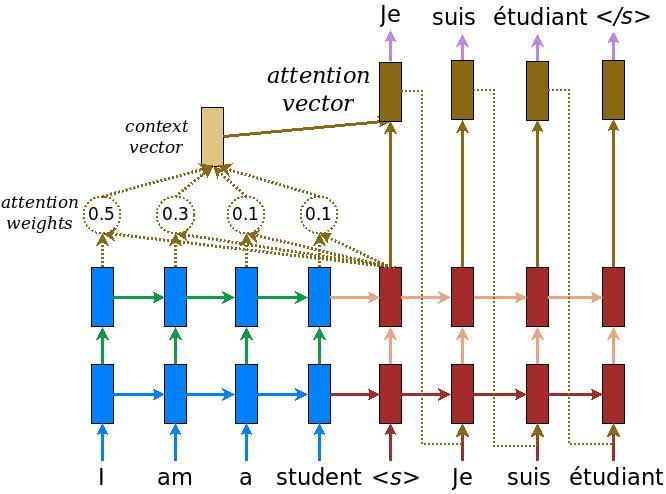

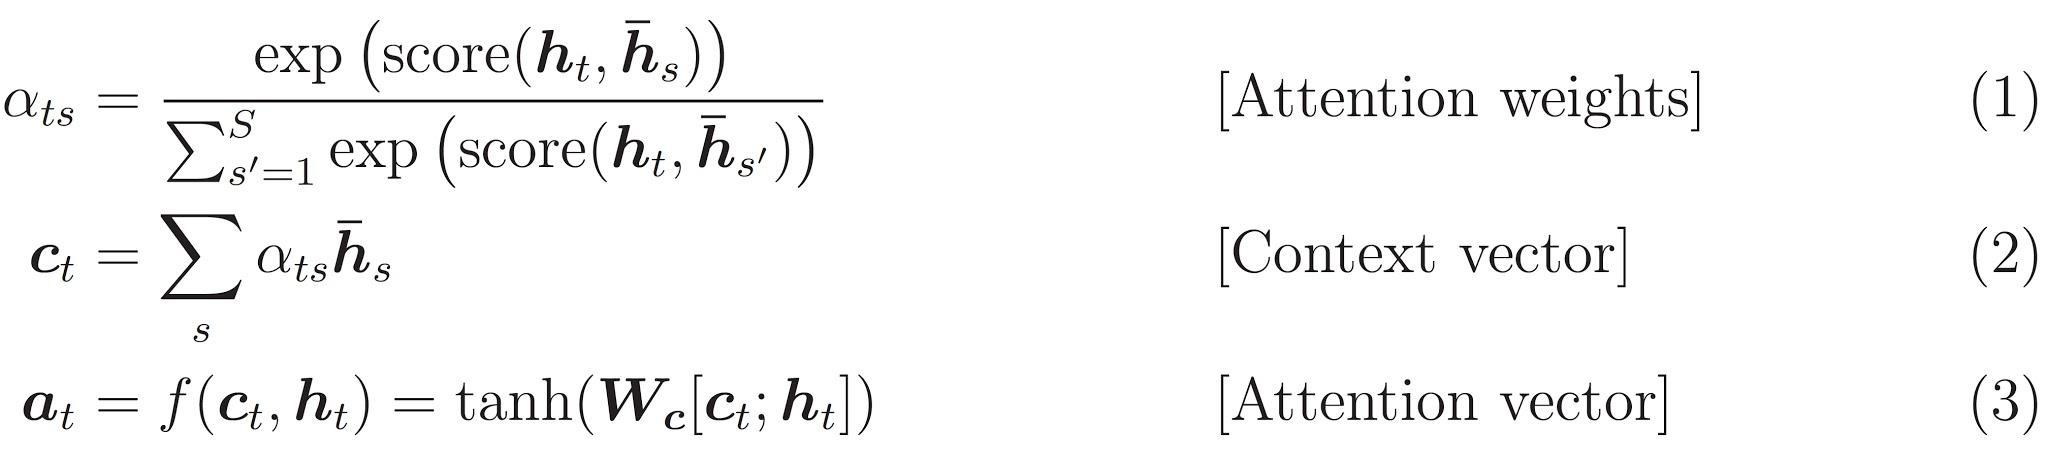

In [ ]:
!pip install MiniAttention

In [ ]:
import MiniAttention.MiniAttention as ma

In [ ]:
def seq2seq_encoder_decoder_glove_bilstm_hybrid_attention(model,maxlen,max_features,embed_size,embedding_matrix,emb_name):
    #Creating LSTM  encoder neural model with no pretrained embeddings
    encoder_inp=Input(shape=(maxlen,))
    encoder_embed=Embedding(max_features,embed_size,weights=[embedding_matrix])(encoder_inp)
    encoder_embed_attention=ma.MiniAttentionBlock(None,None,None,keras.regularizers.L2(l2=0.02),None,None,None,None,None)(encoder_embed)
    encoder_lstm_cell=Bidirectional(model,merge_mode="sum")
    encoder_outputs,encoder_flstm_h,encoder_flstm_c,encoder_blstm_h,encoder_blstm_c = encoder_lstm_cell(encoder_embed_attention)
    print(f'Encoder Ouputs Shape{encoder_outputs.shape}')
    encoded_states=[encoder_flstm_h + encoder_blstm_h,encoder_flstm_c + encoder_blstm_c]
    #Creating LSTM decoder model and feeding the output states (h,c) of lstm of encoders
    decoder_inp=Input(shape=(maxlen,))
    decoder_embed=Embedding(max_features,embed_size,weights=[embedding_matrix])(decoder_inp)
    
    decoder_lstm_cell = model
    decoder_outputs,_,_=decoder_lstm_cell(decoder_embed,initial_state=encoded_states)
    
    decoder_dense_cell = Dense(16,activation='relu')
    decoder_d_output = decoder_dense_cell(decoder_outputs)
    decoder_dense_cell2 = Dense(3,activation='softmax')
    decoder_output = decoder_dense_cell2(decoder_d_output)
    model = Model([encoder_inp,decoder_inp],decoder_output)         
    model.summary()
    model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
    plot_model(
        model,to_file=emb_name,
        show_shapes=True,
        show_layer_names=True,
        rankdir="TB",
        expand_nested=False,
        dpi=96)
    model.fit([train_x,train_x],train_y,batch_size=512,epochs=3,verbose=2)

In [ ]:
seq2seq_encoder_decoder_glove_bilstm_hybrid_attention(LSTM(60,return_state=True),maxlen,max_features,len(golve_emd_matrix[0]),golve_emd_matrix,"seq2seq_encoder_decoder_model_glovetext.png")

In [ ]:
class Bahadanu_Attention(tf.keras.layers.Layer):
    def __init__(self,units):
        super(Bahadanu_Attention,self).__init__()
        self.units=units
        self.Wq=tf.keras.layers.Dense(self.units)
        self.Wk=tf.keras.layers.Dense(self.units)
        self.Wv=tf.keras.layers.Dense(60)
        
    def call(self,q,v):
        self.q=q
        self.v=v
        q_t=tf.expand_dims(self.q,1)
        score=self.Wv(tf.nn.tanh(self.Wq(self.q)+self.Wk(self.v)))
        attention_wts=tf.nn.softmax(score,axis=1)
        context_vector=(attention_wts*self.v)
        context_vector=tf.reduce_sum(context_vector,axis=1)
        return context_vector,attention_wts

In [ ]:
def seq2seq_encoder_decoder_glove_bilstm_hybrid_bahdanau(maxlen,max_features,embed_size,embedding_matrix,):
    #Creating GRU encoder neural model with pretrained embeddings
    encoder_inp = Input(shape=(maxlen,))
    encoder_embed = Embedding(max_features,embed_size,weights=[embedding_matrix])(encoder_inp)
    encoder_gru_cell = GRU(60,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
    encoder_outputs,encoder_state_flstm_h =encoder_gru_cell(encoder_embed)
    print(f'Encoder Ouputs Shape{encoder_outputs.shape}')
    #Creating GRU decoder model and feeding the output states of gru encoders
    decoder_inp=Input(shape=(maxlen,))
    decoder_embed=Embedding(max_features,embed_size,weights=[embedding_matrix])(decoder_inp)
    bahdanau_attention=Bahadanu_Attention(60)
    
    context_vector,attention_weights = bahdanau_attention(encoder_state_flstm_h,encoder_outputs)
    decoder_gru_cell = GRU(60,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
    decoder_outputs,decoder_state_flstm_h= decoder_gru_cell(decoder_embed,initial_state=context_vector)
    decoder_dense_cell= Dense(64,activation='relu')
    decoder_outputs = tf.reshape(decoder_outputs, (-1, decoder_outputs.shape[2]))
    decoder_d_output=decoder_dense_cell(decoder_outputs)
    decoder_dense_cell2=Dense(3,activation='softmax')
    decoder_output=decoder_dense_cell2(decoder_d_output)
    model=Model([encoder_inp,decoder_inp],decoder_output)
    model.summary()
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    plot_model(
        model,to_file="seq2seq_encoder_decoder_model_glove_bilstm_bahdanau_attention.png",
        show_shapes=True,
        show_layer_names=True,
        rankdir="TB",
        expand_nested=False,
        dpi=96)

    model.fit([train_x,train_x],train_y,batch_size=512,epochs=2,verbose=2)

In [ ]:
class Luong_Attention(tf.keras.layers.Layer):
    def __init__(self,units):
        super(Luong_Attention,self).__init__()
        self.units=units
        self.Wq=tf.keras.layers.Dense(self.units)
        self.Wk=tf.keras.layers.Dense(self.units)
        self.Wv=tf.keras.layers.Dense(60)
        
    def call(self,q,v):
        self.q=q
        self.v=v
        q_t=tf.expand_dims(self.q,1)
        score=(self.q)*(self.v)
        attention_wts=tf.nn.softmax(score,axis=1)
        context_vector=(attention_wts*self.v)
        context_vector=tf.reduce_sum(context_vector,axis=1)
        return context_vector,attention_wts
    

In [ ]:
golve_emd_file = '../input/glove-global-vectors-for-word-representation/glove.6B.50d.txt'
golve_emd_matrix = create_Embedding_matrix(golve_emd_file,tokenized_data)
seq2seq_encoder_decoder_glove_bilstm_hybrid_bahdanau(maxlen,max_features,len(golve_emd_matrix[0]),golve_emd_matrix,)

In [ ]:
seq2seq_encoder_decoder_glove_bilstm_hybrid_bahdanau(maxlen,max_features,len(golve_emd_matrix[0]),golve_emd_matrix,)